<h2 align="center"> Statistical Learning 1 </h2>
<h2 align="center"> Proyecto #1 </h2>
** Marvin Diaz Carnet 9516008 **

In [620]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from scipy.stats import norm

In [490]:
data = np.load('C:/proyecto_data/proyecto_training_data.npy')

In [491]:
data

array([[2.08500e+05, 7.00000e+00, 8.56000e+02, 8.00000e+00, 2.00300e+03,
        6.50000e+01],
       [1.81500e+05, 6.00000e+00, 1.26200e+03, 6.00000e+00, 1.97600e+03,
        8.00000e+01],
       [2.23500e+05, 7.00000e+00, 9.20000e+02, 6.00000e+00, 2.00100e+03,
        6.80000e+01],
       ...,
       [2.66500e+05, 7.00000e+00, 1.18800e+03, 9.00000e+00, 1.94100e+03,
        6.60000e+01],
       [1.42125e+05, 5.00000e+00, 1.07800e+03, 5.00000e+00, 1.95000e+03,
        6.80000e+01],
       [1.47500e+05, 5.00000e+00, 1.25600e+03, 6.00000e+00, 1.96500e+03,
        7.50000e+01]])

In [492]:
dataset = pd.DataFrame(data,
            columns=['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd',
                     'YearBuilt', 'LotFrontage'])
dataset.head()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0


## 2. Slicing data: entrenamiento 80%; validación y pruebas 20%

In [493]:
#cuenta las filas y columnas del dataset cargado con numpy
filas, columnas = data.shape
print(filas,columnas)

1460 6


In [494]:
veinte_porc  = int(filas*0.2)
ochenta_porc = int(filas*0.8)
np.random.shuffle(data)
training, test = data[:ochenta_porc,:], data[:veinte_porc,:]

### Training set

In [684]:
df_training = pd.DataFrame(training, columns=['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd',
                     'YearBuilt', 'LotFrontage'])
df_training.head()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,112000.0,4.0,960.0,5.0,1956.0,70.0
1,160000.0,7.0,624.0,4.0,1999.0,24.0
2,315500.0,9.0,1620.0,6.0,2007.0,89.0
3,196500.0,7.0,860.0,7.0,2004.0,89.0
4,257000.0,8.0,1844.0,7.0,2005.0,88.0


In [496]:
df_training.describe()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,956.000000
mean,180563.732877,6.089897,1164.864726,6.495719,1971.136986,69.885983
std,80124.267287,1.385307,391.417888,1.626678,30.057672,24.678128
min,35311.000000,1.000000,334.000000,2.000000,1875.000000,21.000000
25%,129975.000000,5.000000,886.750000,5.000000,1953.000000,58.000000
50%,163000.000000,6.000000,1088.000000,6.000000,1972.000000,69.000000
75%,209050.000000,7.000000,1392.000000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000


### Test set

In [546]:
df_test = pd.DataFrame(test, columns=['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd',
                     'YearBuilt', 'LotFrontage'])
df_test.head()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,112000.0,4.0,960.0,5.0,1956.0,70.0
1,160000.0,7.0,624.0,4.0,1999.0,24.0
2,315500.0,9.0,1620.0,6.0,2007.0,89.0
3,196500.0,7.0,860.0,7.0,2004.0,89.0
4,257000.0,8.0,1844.0,7.0,2005.0,88.0


In [576]:
x_test = df_test['OverallQual']
x_test

0      4.0
1      7.0
2      9.0
3      7.0
4      8.0
      ... 
287    5.0
288    8.0
289    8.0
290    5.0
291    6.0
Name: OverallQual, Length: 292, dtype: float64

In [498]:
df_test.describe()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,292.000000,292.000000,292.000000,292.000000,292.000000,238.000000
mean,178303.914384,6.078767,1158.267123,6.547945,1970.082192,69.886555
std,71652.807920,1.345973,392.502707,1.599322,29.668039,21.792456
min,75000.000000,3.000000,483.000000,3.000000,1880.000000,21.000000
25%,129975.000000,5.000000,893.500000,5.000000,1954.000000,60.000000
50%,162450.000000,6.000000,1081.500000,6.000000,1972.500000,70.000000
75%,211500.000000,7.000000,1398.250000,7.000000,1997.000000,80.750000
max,485000.000000,10.000000,3138.000000,12.000000,2009.000000,141.000000


## 3.Análisis exploratorio de datos

In [499]:
dataset.describe()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000
mean,180921.195890,6.099315,1162.626712,6.517808,1971.267808,70.049958
std,79442.502883,1.382997,386.587738,1.625393,30.202904,24.284752
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,129975.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,163000.000000,6.000000,1087.000000,6.000000,1973.000000,69.000000
75%,214000.000000,7.000000,1391.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000


In [500]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SalePrice     1460 non-null   float64
 1   OverallQual   1460 non-null   float64
 2   1stFlrSF      1460 non-null   float64
 3   TotRmsAbvGrd  1460 non-null   float64
 4   YearBuilt     1460 non-null   float64
 5   LotFrontage   1201 non-null   float64
dtypes: float64(6)
memory usage: 68.6 KB


In [501]:
# La variable LotFrontage contiene valores nulos, se agrega la media a los valores nulos
#Para el dataset completo
meanValue = np.round(dataset['LotFrontage'].mean(), 0)
dataset['LotFrontage'] = dataset['LotFrontage'].fillna(meanValue)

#Para el dataset de entrenamiento
meanValue_train = np.round(df_training['LotFrontage'].mean(), 0)
df_training['LotFrontage'] = df_training['LotFrontage'].fillna(meanValue_train)

#Para el dataset de pruebas
meanValue_test = np.round(df_test['LotFrontage'].mean(), 0)
df_test['LotFrontage'] = df_test['LotFrontage'].fillna(meanValue_test)

In [502]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SalePrice     1460 non-null   float64
 1   OverallQual   1460 non-null   float64
 2   1stFlrSF      1460 non-null   float64
 3   TotRmsAbvGrd  1460 non-null   float64
 4   YearBuilt     1460 non-null   float64
 5   LotFrontage   1460 non-null   float64
dtypes: float64(6)
memory usage: 68.6 KB


## 4.Histograma de cada variable

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

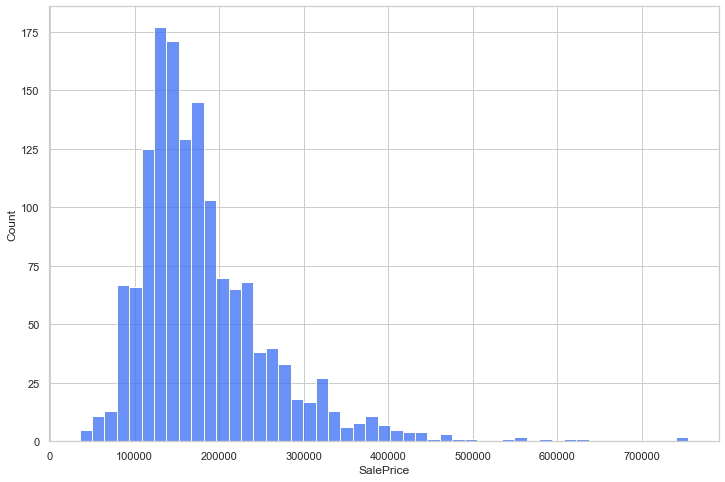

In [503]:
sns.histplot(dataset['SalePrice'])   

<AxesSubplot:xlabel='OverallQual', ylabel='Count'>

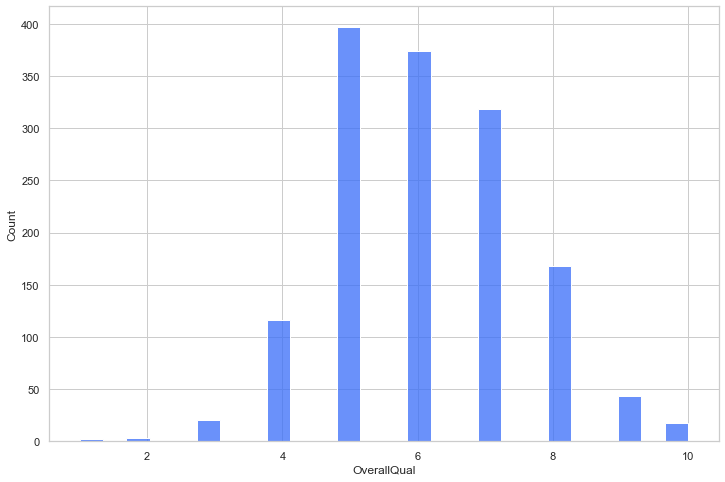

In [504]:
sns.histplot(dataset['OverallQual'])        

<AxesSubplot:xlabel='1stFlrSF', ylabel='Count'>

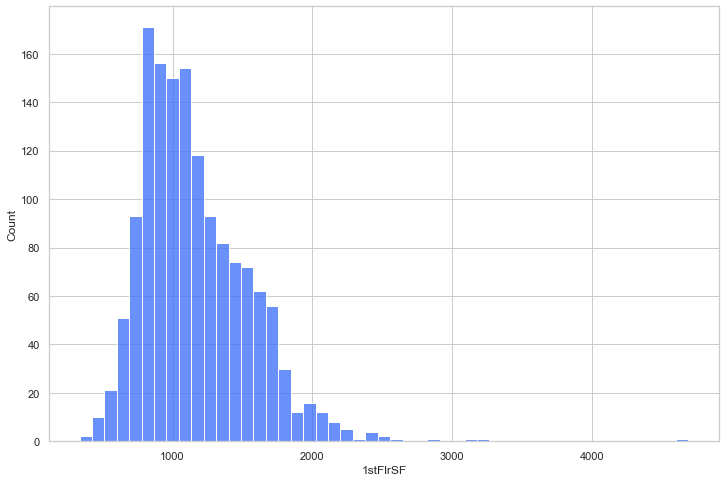

In [505]:
sns.histplot(dataset['1stFlrSF'])

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='Count'>

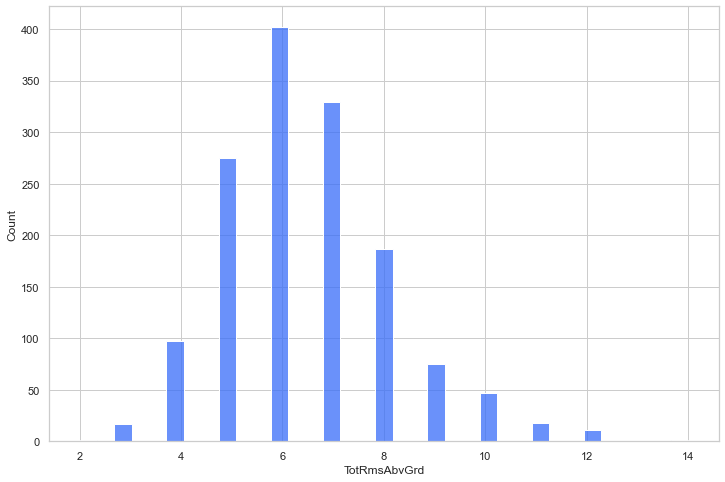

In [506]:
sns.histplot(dataset['TotRmsAbvGrd'])   

<AxesSubplot:xlabel='YearBuilt', ylabel='Count'>

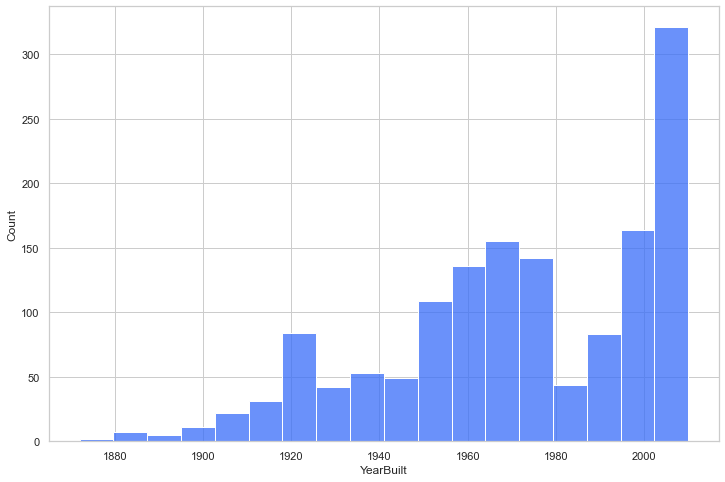

In [507]:
sns.histplot(dataset['YearBuilt'])   

<AxesSubplot:xlabel='LotFrontage', ylabel='Count'>

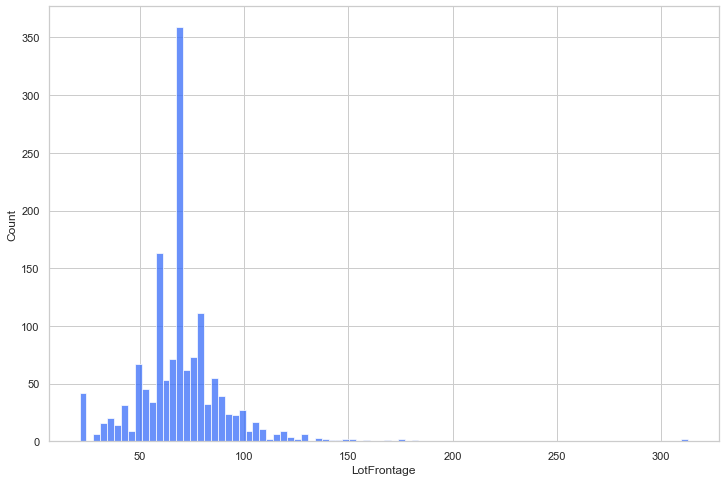

In [508]:
sns.histplot(dataset['LotFrontage'])   

c:\Users\Marvin\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


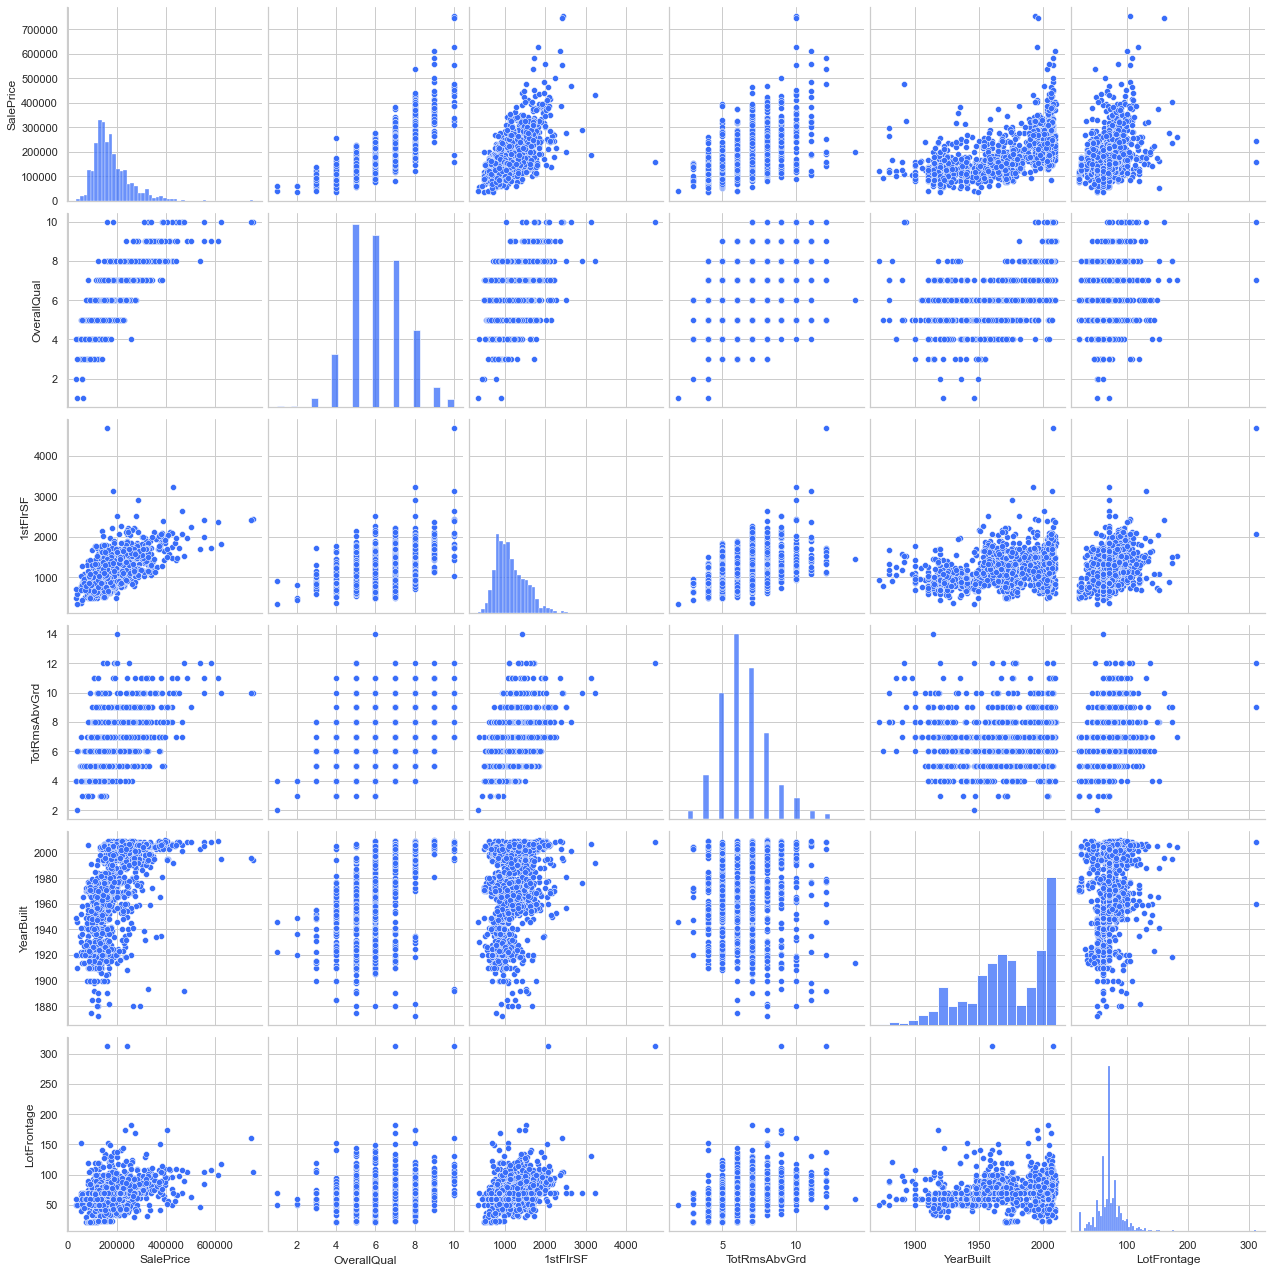

In [509]:
#Variables juntas
sns.set(style='whitegrid', palette="rainbow", context='notebook')
cols = ['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd',
                     'YearBuilt', 'LotFrontage']
sns.pairplot(dataset[cols], size =3)
plt.show()

## 5.Coeficiente de correlación

In [511]:
def calcCorrCoef(df, target):
    #X = df.copy()
    #df.drop([target], inplace=True)
    for col in df.columns:
        print('Correlación -' + col + ':',
             df[target].corr(df[col], method='pearson'))

In [512]:
calcCorrCoef(dataset, 'SalePrice')

Correlación -SalePrice: 0.9999999999999998
Correlación -OverallQual: 0.7909816005838046
Correlación -1stFlrSF: 0.6058521846919145
Correlación -TotRmsAbvGrd: 0.5337231555820282
Correlación -YearBuilt: 0.5228973328794968
Correlación -LotFrontage: 0.33489718326981477


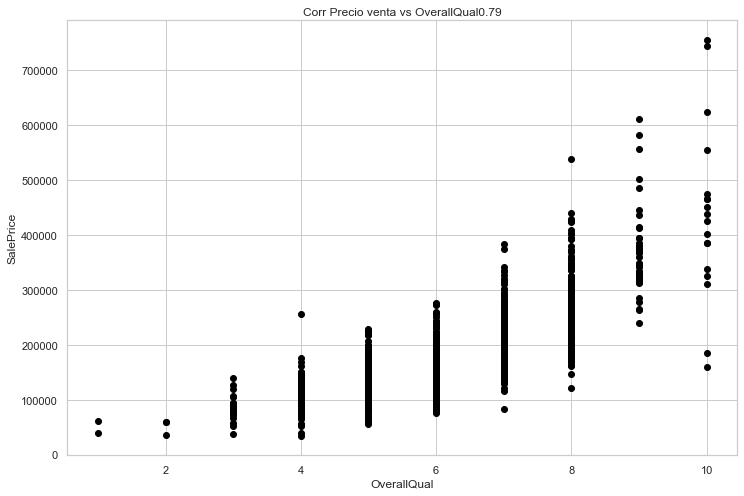

In [513]:
calcCorrCoef1 = dataset['SalePrice'].corr(dataset['OverallQual'])
plt.scatter(dataset['OverallQual'], dataset['SalePrice'], color = 'black')
plt.title("Corr Precio venta vs OverallQual" + ('%.2f' % calcCorrCoef1))
plt.xlabel("OverallQual")
plt.ylabel('SalePrice')
plt.show()

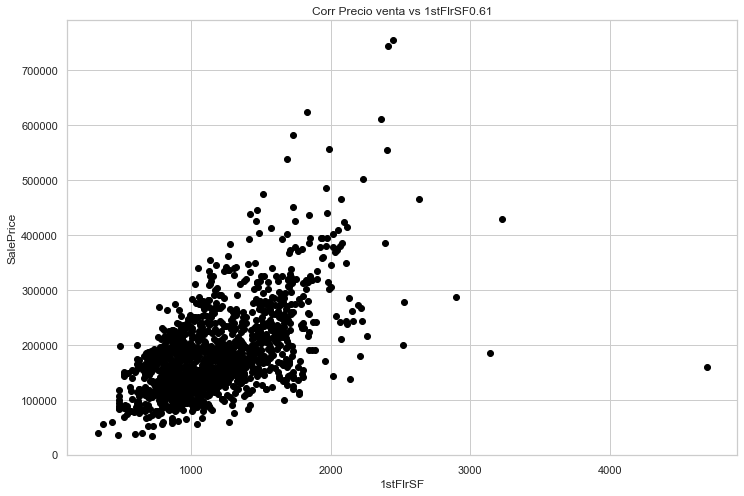

In [514]:
calcCorrCoef2 = dataset['SalePrice'].corr(dataset['1stFlrSF'])
plt.scatter(dataset['1stFlrSF'], dataset['SalePrice'], color = 'black')
plt.title("Corr Precio venta vs 1stFlrSF" + ('%.2f' % calcCorrCoef2))
plt.xlabel("1stFlrSF")
plt.ylabel('SalePrice')
plt.show()

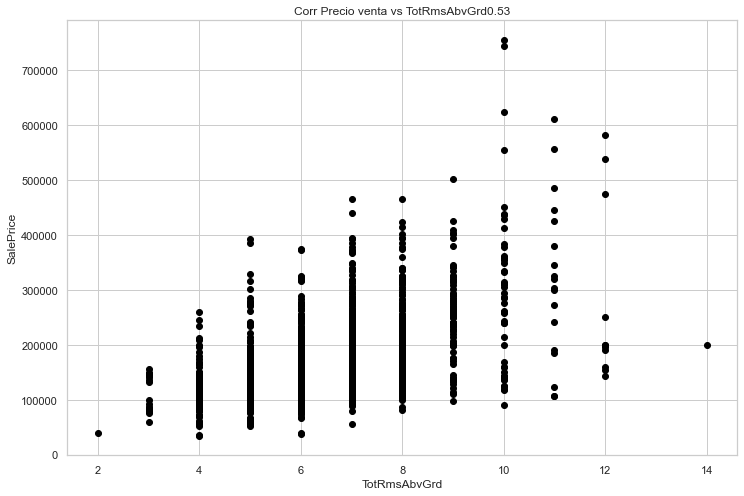

In [515]:
calcCorrCoef3 = dataset['SalePrice'].corr(dataset['TotRmsAbvGrd'])
plt.scatter(dataset['TotRmsAbvGrd'], dataset['SalePrice'], color = 'black')
plt.title("Corr Precio venta vs TotRmsAbvGrd" + ('%.2f' % calcCorrCoef3))
plt.xlabel("TotRmsAbvGrd")
plt.ylabel('SalePrice')
plt.show()

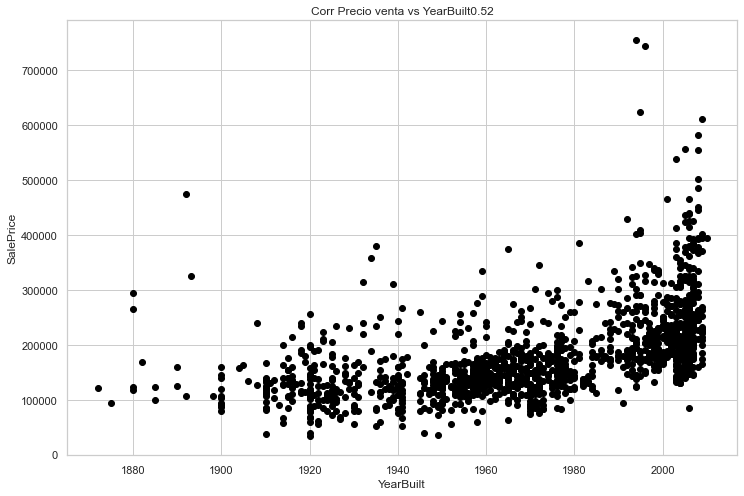

In [516]:
calcCorrCoef4 = dataset['SalePrice'].corr(dataset['YearBuilt'])
plt.scatter(dataset['YearBuilt'], dataset['SalePrice'], color = 'black')
plt.title("Corr Precio venta vs YearBuilt" + ('%.2f' % calcCorrCoef4))
plt.xlabel("YearBuilt")
plt.ylabel('SalePrice')
plt.show()

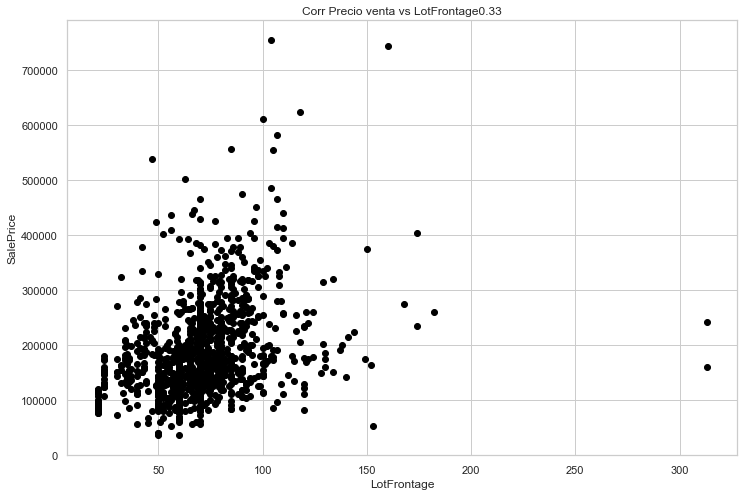

In [517]:
calcCorrCoef5 = dataset['SalePrice'].corr(dataset['LotFrontage'])
plt.scatter(dataset['LotFrontage'], dataset['SalePrice'], color = 'black')
plt.title("Corr Precio venta vs LotFrontage" + ('%.2f' % calcCorrCoef5))
plt.xlabel("LotFrontage")
plt.ylabel('SalePrice')
plt.show()

In [518]:
#Calcular el coeficiente de correlacion entre x y y.
matriz_correlacion = dataset.corr()
matriz_correlacion

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
SalePrice,1.000000,0.790982,0.605852,0.533723,0.522897,0.334897
OverallQual,0.790982,1.000000,0.476224,0.427452,0.572323,0.234227
1stFlrSF,0.605852,0.476224,1.000000,0.409516,0.281986,0.414246
TotRmsAbvGrd,0.533723,0.427452,0.409516,1.000000,0.095589,0.320166
YearBuilt,0.522897,0.572323,0.281986,0.095589,1.000000,0.117555
LotFrontage,0.334897,0.234227,0.414246,0.320166,0.117555,1.000000


<AxesSubplot:>

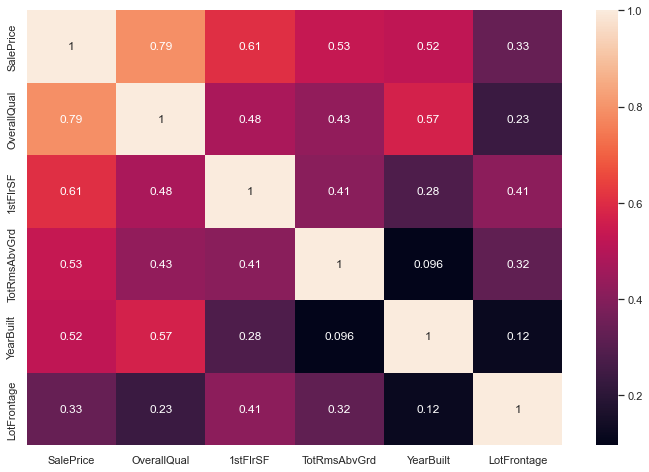

In [519]:
sns.heatmap(matriz_correlacion, annot=True)

## 6.Calcular una función para entrenar un modelo de regresión lineal de una variable:
 
\begin{equation}
 y = β_0 + β_1 * x
\end{equation}


In [621]:
#6.1 Vector con la variable independiente x
#x = df_proyecto['OverallQual'] #dataset completo
x = df_training['OverallQual']#dataset de entrenamiento
#6.2 Vector con la variable dependiente y
#y = df_proyecto['SalePrice'] #dataset completo
y = df_training['SalePrice']#dataset de entrenamiento

In [622]:
# Calcular el gradiente del error respecto de cada parámetro con las expresiones:
def calculo_gradiente(m_, b_, alpha, x, y):
    N = x.shape[0]      # Cantidad de datos

    # Gradientes: derivadas de la función de error con respecto
    # a los parámetros "m" y "b"
    dm = -(2/N)*np.sum(x*(y-(m_*x+b_)))
    db = -(2/N)*np.sum(y-(m_*x+b_))

    # Actualizar los pesos usando la fórmula del gradiente descendente
    m = m_ - alpha*dm
    b = b_ - alpha*db

    return m, b

In [624]:
#6.3 un entero epochs que indica por cuantas iteraciones entrenar el modelo

epochs = 100000

#6.4 un entero imprimir error cada, que nos indica cada cuantas iteraciones queremos
#imprimir a traves de print: el numero de iteracion, el error del modelo en esa iteracion,
#si imprimir error cada = 10, se despliega en pantalla el error en las iteraciones:
#10,20,30,40,50.

imprime_error_cada = 10

#6.5 escalar α(learning rate): es usado como parte de la expresion matematica para actualizar
#en cada iteracion los parametros del modelo

alpha = 0.0004


#7. Para crear su funcion debe considerar lo siguiente:
# * Crear una matriz de 2 columnas, la primera columna corresponde al vector de datos x
#   y la segunda columna de la matriz para todas las filas es igual a 1.

# * Inicializar los parametros del modelo en un vector β0 y β1, esto es equivalente a empezar
#   el proceso con una recta inicial la cual en cada iteracion actualizaremos hasta encontrar
#   una que aproxime de buena manera los datos x, y.

m = 0
b = 0

#total de registros del dataset
N = y.shape[0]

# Almacenar en una estructura de datos el modelo resultante
resultados = pd.DataFrame(columns=['epoch','Error','B0','B1'])
resultados

#por cada epoch(iteracion) debe:
error = np.zeros((epochs,1))
for i in range(epochs):
    # • Calcular el gradiente del error respecto de cada parametro con las expresiones:
    [m, b] = calculo_gradiente(m,b,alpha,x,y)

    # Calcular yˆ(prediccion o estimacioon) para todas las observaciones de manera simultanea(vectorizada)
    # utilizando el modelo correspondiente a la iteracion(es decir, los valores de β0 y β1,):
    # esto produce un vector yˆ con el mismo numero de elementos que y.
    # Conceptualmente el calcular vectorizadamente la prediccion para una unica observacion del datdataset,
    # significaria aplicar el modelo lineal a esta observaci´on por ejemplo, si x = 2,
    # y los parametros son β1 = 0,1 , β0 = 0,2 tendrıamos: yˆ = 0,1(2) + 0,2
    
    y_pred = m*x+b

    # Calcular el error o costo usando: yˆ
    # Almacenar en un vector el error de cada iteracion.
    error[i] = np.sum((y-y_pred)**2)/N
    errores = "{:.2e}".format(np.sum((y-y_pred)**2)/N)
    # Almacenar en una estructura de datos el modelo resultante(a discrecion del estudiante,
    # por ejemplo un diccionario donde la llave es el numero de iteracion y el valor es un vector con los parametros).
    resultados.loc[len(resultados.index)] = [i+1,errores,b,m]
    if (i+1)%imprime_error_cada == 0:
        print("Epoch: {}".format(i+1))
        print("m:     {:.1f}".format(m))
        print("b:     {:.1f}".format(b))
        print("error: {}".format(error[i]))
        print("-----*************-----")

Epoch: 10
m:     8245.0
b:     1248.2
error: [2.17623926e+10]
-----*************-----
Epoch: 20
m:     14204.7
b:     2139.3
error: [1.27518292e+10]
-----*************-----
Epoch: 30
m:     18513.0
b:     2772.1
error: [8.04649376e+09]
-----*************-----
Epoch: 40
m:     21628.0
b:     3218.5
error: [5.58926574e+09]
-----*************-----
Epoch: 50
m:     23880.7
b:     3530.0
error: [4.30595639e+09]
-----*************-----
Epoch: 60
m:     25510.3
b:     3744.2
error: [3.63564498e+09]
-----*************-----
Epoch: 70
m:     26689.5
b:     3887.9
error: [3.28542945e+09]
-----*************-----
Epoch: 80
m:     27543.4
b:     3980.9
error: [3.102362e+09]
-----*************-----
Epoch: 90
m:     28162.1
b:     4037.1
error: [3.0065762e+09]
-----*************-----
Epoch: 100
m:     28611.0
b:     4066.7
error: [2.95636736e+09]
-----*************-----
Epoch: 110
m:     28937.0
b:     4077.2
error: [2.92995808e+09]
-----*************-----
Epoch: 120
m:     29174.3
b:     4073.8
error

In [625]:
resultados

,epoch,Error,B0,B1
0,1,3.67e+10,144.450986,950.052423
1,2,3.46e+10,284.157834,1869.756204
2,3,3.26e+10,419.272196,2760.081437
3,4,3.08e+10,549.940875,3621.967207
4,5,2.90e+10,676.305982,4456.322583
...,...,...,...,...
99995,99996,2.38e+09,-96549.468599,45521.290067
99996,99997,2.38e+09,-96549.554022,45521.303421
99997,99998,2.38e+09,-96549.639441,45521.316774
99998,99999,2.38e+09,-96549.724857,45521.330127


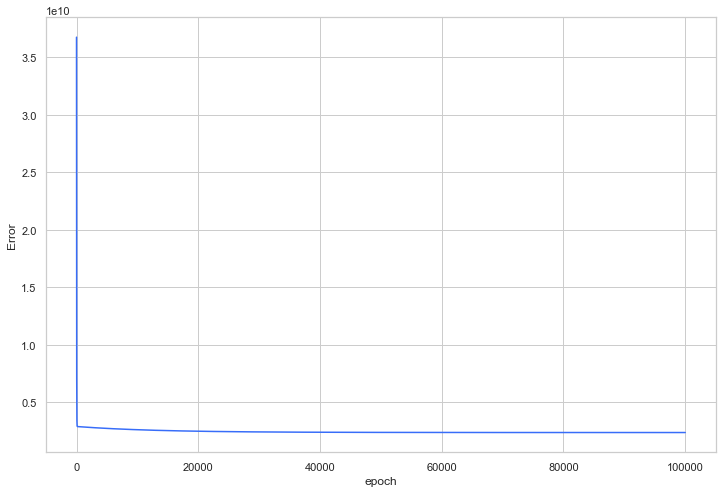

In [626]:
# • Crear una funcion que nos permita visualizar con matplotlib como cambia el error en el tiempo:
# crear una funcion que tome como parametro el vector de errores generados por la funcion de entrenamiento
# y grafique en el eje x el numero de iteracion y en el eje y el error para esa iteracion.

# • Crear una funcion que nos permita visualizar con matplotlib como evoluciona el
#   modelo entrenado en el tiempo : Crear una funcion que tome como parametro la
#   estructura de datos conteniendo el historial de modelos ,y un valor ?n? que indica
#   cada cuantas iteraciones graficar el modelo resultante, por ejemplo para n=3 la
#   funcion debe graficar la recta correspondiente al modelo junto a los datos cada 3
#   iteraciones, si se ejecutaron 15 iteraciones , para n = 3 se grafica el modelo de las
#   iteraciones 3,6,9,12,15 junto con los datos de entrenamiento.


# Criterio: El error debe disminuir lo m´as posible por lo cual la curva de aprendizaje
# debe disminuir hasta que ya no disminuya mucho (se estabilice o converja ) , si el
# error baja y comienza a subir debemos usar menos iteraciones

plt.plot(range(epochs),error)
plt.xlabel('epoch')
plt.ylabel('Error')
plt.show()

In [627]:
#RMSE
rmse_modelo1 = np.sqrt(((y-y_pred) ** 2).mean())
print(f"El error (rmse) de test es: {rmse_modelo1}")

El error (rmse) de test es: 48789.46175706684


In [628]:
ultimo_registro = resultados['epoch'].max() -1
max_resultados = resultados.iloc[ultimo_registro][['B0','B1']]

In [629]:
x_test

,OverallQual
694,5.0
1116,4.0
58,5.0
70,10.0
1030,4.0
...,...
535,5.0
728,5.0
135,6.0
543,8.0


In [630]:
B0 = max_resultados[0]
B1 = max_resultados[1]

In [631]:
def calcula_prediccion(b1,b0,x):
    return (x * b1) + b0

In [632]:
prediccion_modelo1 = pd.DataFrame(columns=['sale_price_prediccion'])
prediccion_modelo1['sale_price_prediccion'] = calcula_prediccion(B1,B0,x_test)

In [633]:
prediccion_modelo1 = prediccion_modelo1.squeeze()
prediccion_modelo1

694     131056.907128
1116     85535.563648
58      131056.907128
70      358663.624525
1030     85535.563648
            ...      
535     131056.907128
728     131056.907128
135     176578.250607
543     267620.937566
243     131056.907128
Name: sale_price_prediccion, Length: 234, dtype: float64

In [634]:
#RMSE
rmse_manual = np.sqrt(((y-prediccion_modelo1) ** 2).mean())
print(f"El error (rmse) de test es: {rmse_manual}")

El error (rmse) de test es: 50344.30056260159


#### • Para cada una de las variables x seleccionadas, usar scikit-learn para entrenar un modelo de regresion lineal: https://scikit-learn.org/stable/modules/generated/
### sklearn.linear_model.LinearRegression.html

In [728]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [729]:
#x = df_proyecto[['OverallQual']] #datset completo
x = df_training[['OverallQual']] #datset de entrenamiento
#y = df_proyecto['SalePrice']#datset completo
y = df_training['SalePrice']#datset de entrenamiento

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [730]:
lrm = LinearRegression()
lrm.fit(x_train, y_train)

LinearRegression()

In [731]:
# Información del modelo
# ==============================================================================
print("Intercept:", lrm.intercept_)
print("Coeficiente:", list(zip(x.columns, lrm.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", lrm.score(x_test, y_test))

Intercept: -101537.05437236425
Coeficiente: [('OverallQual', 46295.53795118235)]
Coeficiente de determinación R^2: 0.5835706000399412


In [732]:
# Error de test del modelo 
# ==============================================================================
predicciones = lrm.predict(X = x_test)
print(predicciones[0:3,])

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")

[129940.63538355  83645.09743237 129940.63538355]

El error (rmse) de test es: 50399.62919508381


Text(0.5, 1.0, 'y_test Vs Prediccion')

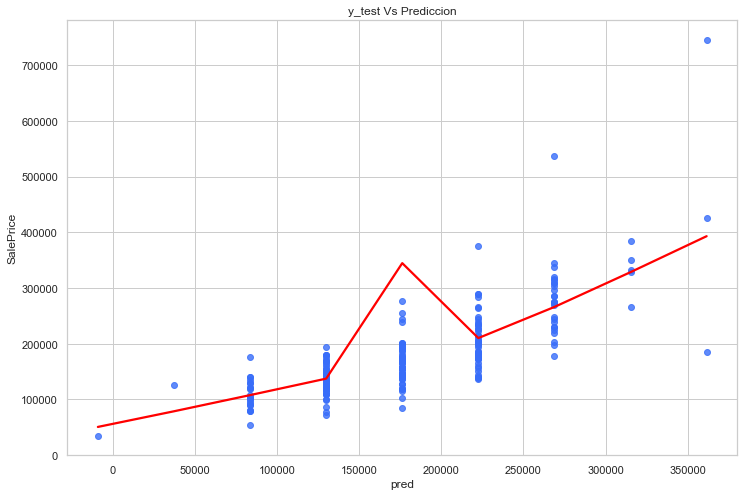

In [733]:
y = pd.Series(predicciones, name="pred")
sns.regplot(x = y, y = y_test, lowess = True, line_kws={"color": "red"})
plt.title("y_test Vs Prediccion")

In [734]:
#La prediccion con el modelo entrenado manualmente
prediccion_modelo1

694     425755.316989
1116    352667.046490
58      425755.316989
70      791196.669485
1030    352667.046490
            ...      
535     425755.316989
728     425755.316989
135     498843.587488
543     645020.128487
243     425755.316989
Name: sale_price_prediccion, Length: 234, dtype: float64

In [735]:
#La prediccion con el modelo de scikit-learn
predicciones = lrm.predict(x_test)
prediccione_sklearn = pd.DataFrame(predicciones,columns= ['prediccion_sklearn'])
prediccione_sklearn

,prediccion_sklearn
0,129940.635384
1,83645.097432
2,129940.635384
3,361418.325139
4,83645.097432
...,...
229,129940.635384
230,129940.635384
231,176236.173335
232,268827.249237


In [736]:
#La combinacion(promedio) de las 2 anteriores.
print('Prediccion manual: ', prediccion_modelo1.mean())
print('Prediccion skelarn: ', prediccione_sklearn.mean())

Prediccion manual:  501967.0178515127
Prediccion skelarn:  prediccion_sklearn    178214.615128
dtype: float64


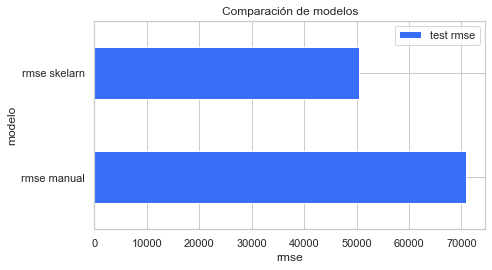

In [737]:
# Usando el 20 % de los datos de validacion, aplicamos los modelos predictivos para
# estimar la variable dependiente y usando los valores reales de y calculamos el error
# de cada modelo. Para cada variable independiente x elegida:
#◦ Graficar el error de cada modelo para esta variable ?x?
df_comparacion = pd.DataFrame({
                    'modelo': ['rmse manual', 'rmse skelarn'],
                    'test rmse': [rmse_modelo1, rmse]
                 })

fig, ax = plt.subplots(figsize=(7, 3.84))
df_comparacion.set_index('modelo').plot(kind='barh', ax=ax)
ax.set_xlabel('rmse')
ax.set_ylabel('modelo')
ax.set_title('Comparación de modelos');

In [ ]:
# 6. Crear una funcion para entrenar un modelo de regresion lineal de una variable y = β0 +β1 ∗x.
# La funcion recibe como argumentos:
# VARIABLE *******1stFlrSF*******

In [647]:
df_training.loc[df_training['1stFlrSF'] <= 1000, '1stFlrSFr'] = 1
df_training.loc[(df_training['1stFlrSF'] > 1000) & (df_training['1stFlrSF'] <= 2000), '1stFlrSFr'] = 2
df_training.loc[(df_training['1stFlrSF'] > 2000) & (df_training['1stFlrSF'] <= 3000), '1stFlrSFr'] = 3
df_training.loc[(df_training['1stFlrSF'] > 3000) & (df_training['1stFlrSF'] <= 4000), '1stFlrSFr'] = 4
df_training.loc[ df_training['1stFlrSF'] > 4000, '1stFlrSFr'] = 5

#6.1 Vector con la variable independiente x
#x = df_proyecto['1stFlrSfr'] #dataset completo
x = df_training['1stFlrSFr'] #dataset de entrenamiento
#6.2 Vector con la variable dependiente y
#y = df_proyecto['SalePrice'] #dataset completo
y = df_training['SalePrice']#dataset de entrenamiento

c:\Users\Marvin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='1stFlrSFr'>

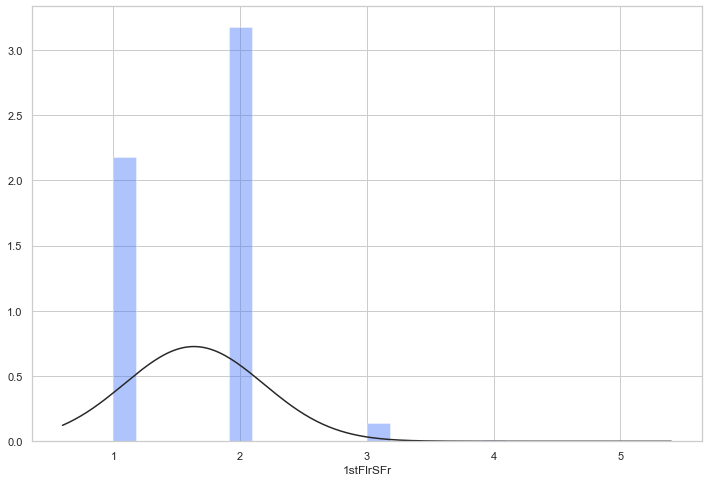

In [648]:
sns.distplot(df_training['1stFlrSFr'], fit=norm, kde=False)

In [649]:
#6.3 un entero epochs que indica por cuantas iteraciones entrenar el modelo

epochs = 600

#6.4 un entero imprimir error cada, que nos indica cada cuantas iteraciones queremos
#imprimir a traves de print: el numero de iteracion, el error del modelo en esa iteracion,
#si imprimir error cada = 10, se despliega en pantalla el error en las iteraciones:
#10,20,30,40,50.

imprime_error_cada = 10

#6.5 escalar α(learning rate): es usado como parte de la expresion matematica para actualizar
#en cada iteracion los parametros del modelo

learning_rate = 0.01


#7. Para crear su funcion debe considerar lo siguiente:
# * Crear una matriz de 2 columnas, la primera columna corresponde al vector de datos x
#   y la segunda columna de la matriz para todas las filas es igual a 1.

# * Inicializar los parametros del modelo en un vector β0 y β1, esto es equivalente a empezar
#   el proceso con una recta inicial la cual en cada iteracion actualizaremos hasta encontrar
#   una que aproxime de buena manera los datos x, y.

m = 0
b = 0

#total de registros del dataset
N = y.shape[0]

# Almacenar en una estructura de datos el modelo resultante
resultados = pd.DataFrame(columns=['epoch','Error','B0','B1'])
resultados

#por cada epoch(iteracion) debe:
error = np.zeros((epochs,1))
for i in range(epochs):
    # • Calcular el gradiente del error respecto de cada parametro con las expresiones:
    [m, b] = calculo_gradiente(m,b,learning_rate,x,y)

    # Calcular yˆ(prediccion o estimacioon) para todas las observaciones de manera simultanea(vectorizada)
    # utilizando el modelo correspondiente a la iteracion(es decir, los valores de β0 y β1,):
    # esto produce un vector yˆ con el mismo numero de elementos que y.
    # Conceptualmente el calcular vectorizadamente la prediccion para una unica observacion del datdataset,
    # significaria aplicar el modelo lineal a esta observaci´on por ejemplo, si x = 2,
    # y los parametros son β1 = 0,1 , β0 = 0,2 tendrıamos: yˆ = 0,1(2) + 0,2
    
    y_pred = m*x+b

    # Calcular el error o costo usando: yˆ
    # Almacenar en un vector el error de cada iteracion.
    error[i] = np.sum((y-y_pred)**2)/N
    errores = "{:.2e}".format(np.sum((y-y_pred)**2)/N)
    # Almacenar en una estructura de datos el modelo resultante(a discrecion del estudiante,
    # por ejemplo un diccionario donde la llave es el numero de iteracion y el valor es un vector con los parametros).
    resultados.loc[len(resultados.index)] = [i+1,errores,b,m]
    if (i+1)%imprime_error_cada == 0:
        print("Epoch: {}".format(i+1))
        print("m:     {:.1f}".format(m))
        print("b:     {:.1f}".format(b))
        print("error: {}".format(error[i]))
        print("-----*************-----")

Epoch: 10
m:     44964.7
b:     25852.1
error: [1.17754213e+10]
-----*************-----
Epoch: 20
m:     64819.7
b:     37530.8
error: [6.40215224e+09]
-----*************-----
Epoch: 30
m:     73526.1
b:     42912.5
error: [5.34126478e+09]
-----*************-----
Epoch: 40
m:     77283.5
b:     45495.0
error: [5.1307759e+09]
-----*************-----
Epoch: 50
m:     78845.0
b:     46831.5
error: [5.08801645e+09]
-----*************-----
Epoch: 60
m:     79433.0
b:     47611.8
error: [5.07836979e+09]
-----*************-----
Epoch: 70
m:     79590.4
b:     48142.3
error: [5.07528973e+09]
-----*************-----
Epoch: 80
m:     79558.1
b:     48558.9
error: [5.07354048e+09]
-----*************-----
Epoch: 90
m:     79443.1
b:     48922.2
error: [5.07208851e+09]
-----*************-----
Epoch: 100
m:     79293.0
b:     49259.2
error: [5.07072895e+09]
-----*************-----
Epoch: 110
m:     79128.9
b:     49581.6
error: [5.06942038e+09]
-----*************-----
Epoch: 120
m:     78959.9
b:   

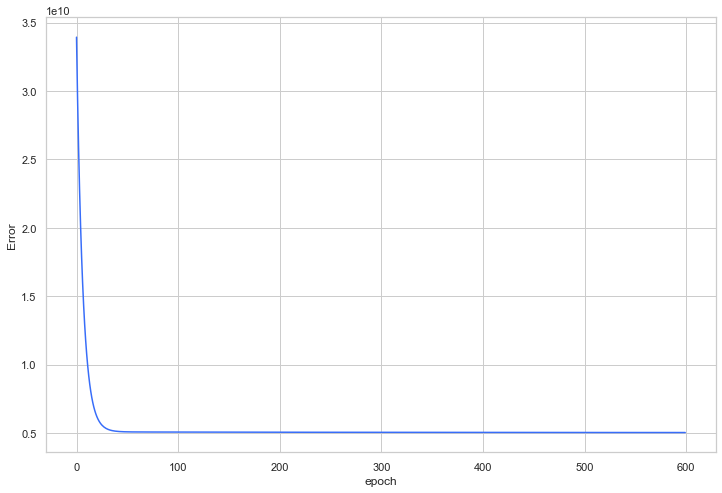

In [650]:
# • Crear una funcion que nos permita visualizar con matplotlib como cambia el error en el tiempo:
# crear una funcion que tome como parametro el vector de errores generados por la funcion de entrenamiento
# y grafique en el eje x el numero de iteracion y en el eje y el error para esa iteracion.

# • Crear una funcion que nos permita visualizar con matplotlib como evoluciona el
#   modelo entrenado en el tiempo : Crear una funcion que tome como parametro la
#   estructura de datos conteniendo el historial de modelos ,y un valor ?n? que indica
#   cada cuantas iteraciones graficar el modelo resultante, por ejemplo para n=3 la
#   funcion debe graficar la recta correspondiente al modelo junto a los datos cada 3
#   iteraciones, si se ejecutaron 15 iteraciones , para n = 3 se grafica el modelo de las
#   iteraciones 3,6,9,12,15 junto con los datos de entrenamiento.


# Criterio: El error debe disminuir lo m´as posible por lo cual la curva de aprendizaje
# debe disminuir hasta que ya no disminuya mucho (se estabilice o converja ) , si el
# error baja y comienza a subir debemos usar menos iteraciones

plt.plot(range(epochs),error)
plt.xlabel('epoch')
plt.ylabel('Error')
plt.show()

In [651]:
#RMSE
rmse_modelo1 = np.sqrt(((y-y_pred) ** 2).mean())
print(f"El error (rmse) de test es: {rmse_modelo1}")

El error (rmse) de test es: 70971.95026451604


In [652]:
ultimo_registro = resultados['epoch'].max() -1
max_resultados = resultados.iloc[ultimo_registro][['B0','B1']]

In [653]:
max_resultados

B0    60313.964493
B1    73088.270499
Name: 599, dtype: object

In [654]:
B0 = max_resultados[0]
B1 = max_resultados[1]

In [655]:
prediccion_modelo1 = pd.DataFrame(columns=['sale_price_prediccion'])
prediccion_modelo1['sale_price_prediccion'] = calcula_prediccion(B1,B0,x_test)
prediccion_modelo1 = prediccion_modelo1.squeeze()
prediccion_modelo1

694     425755.316989
1116    352667.046490
58      425755.316989
70      791196.669485
1030    352667.046490
            ...      
535     425755.316989
728     425755.316989
135     498843.587488
543     645020.128487
243     425755.316989
Name: sale_price_prediccion, Length: 234, dtype: float64

In [656]:
#RMSE
rmse_manual = np.sqrt(((y-prediccion_modelo1) ** 2).mean())
print(f"El error (rmse) de test es: {rmse_manual}")

El error (rmse) de test es: 329172.52929831605


In [718]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

### UTILIZANDO SKLEARN

In [720]:
#x = df_proyecto[['OverallQual']] #datset completo
x = df_training[['1stFlrSF']] #datset de entrenamiento
#y = df_proyecto['SalePrice']#datset completo
y = df_training['SalePrice']#datset de entrenamiento

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [721]:
lrm = LinearRegression()
lrm.fit(x_train, y_train)

LinearRegression()

In [722]:
# Información del modelo
# ==============================================================================
print("Intercept:", lrm.intercept_)
print("Coeficiente:", list(zip(x.columns, lrm.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", lrm.score(x_test, y_test))

Intercept: 33786.25960430098
Coeficiente: [('1stFlrSF', 125.81794904311967)]
Coeficiente de determinación R^2: 0.293039737492536


In [723]:
# Error de test del modelo 
# ==============================================================================
predicciones = lrm.predict(X = x_test)
print(predicciones[0:3,])

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")

[166272.55994671 176212.17792111 142492.96757756]

El error (rmse) de test es: 65668.05469962003


Text(0.5, 1.0, 'y_test Vs Prediccion')

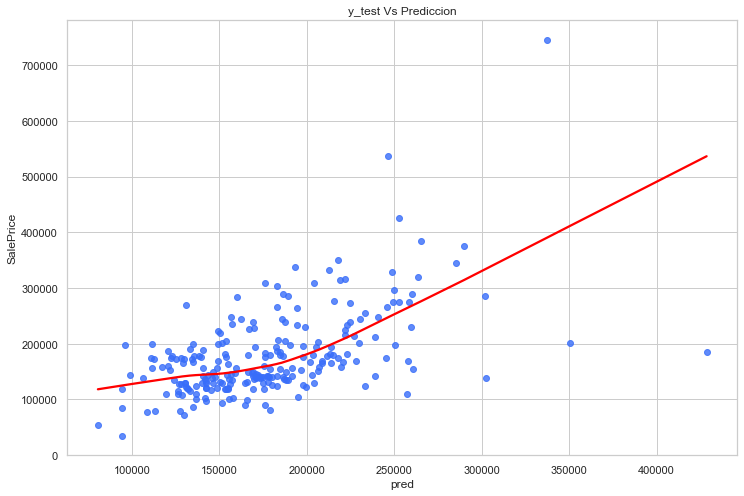

In [724]:
y = pd.Series(predicciones, name="pred")
sns.regplot(x = y, y = y_test, lowess = True, line_kws={"color": "red"})
plt.title("y_test Vs Prediccion")

In [725]:
#La prediccion con el modelo de scikit-learn
predicciones = lrm.predict(x_test)
prediccione_sklearn = pd.DataFrame(predicciones,columns= ['prediccion_sklearn'])
prediccione_sklearn

,prediccion_sklearn
0,166272.559947
1,176212.177921
2,142492.967578
3,428602.983702
4,178728.536902
...,...
229,143751.147068
230,108773.757234
231,94556.328992
232,249941.496060


In [726]:
#La combinacion(promedio) de las 2 anteriores.
print('Prediccion manual: ', prediccion_modelo1.mean())
print('Prediccion skelarn: ', prediccione_sklearn.mean())

Prediccion manual:  501967.0178515127
Prediccion skelarn:  prediccion_sklearn    177960.724803
dtype: float64


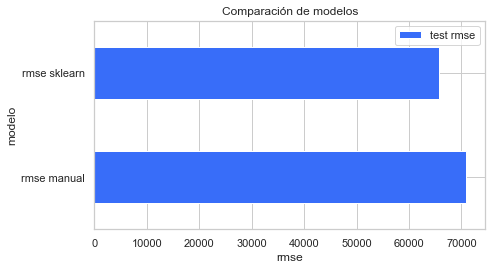

In [727]:
# Usando el 20 % de los datos de validacion, aplicamos los modelos predictivos para
# estimar la variable dependiente y usando los valores reales de y calculamos el error
# de cada modelo. Para cada variable independiente x elegida:
#◦ Graficar el error de cada modelo para esta variable ?x?
df_comparacion = pd.DataFrame({
                    'modelo': ['rmse manual', 'rmse sklearn'],
                    'test rmse': [rmse_modelo1, rmse]
                 })

fig, ax = plt.subplots(figsize=(7, 3.84))
df_comparacion.set_index('modelo').plot(kind='barh', ax=ax)
ax.set_xlabel('rmse')
ax.set_ylabel('modelo')
ax.set_title('Comparación de modelos');

#### Conclusion
* La variable OverallQual y la variable 1stFLrSF el rmse manual es mayor que el rmse obtenido de sickit-learn